# Mini-Projeto MLP-CNN
## Centro de Informática da UFPE
### IF702 - Redes Neurais
### Germano Crispim Vasconcelos

27/01/2025

Grupo:
1. Pedro Lima (pbsl@cin.ufpe.br)
2. Pedro de Souza (pbsl@cin.ufpe.br)
3. Pedro Barros (pbsl@cin.ufpe.br)


# Imports e Downloads

As principais bibliotecas Python utilizadas para esta atividade foram:

- Pandas
- Numpy
- Scikit-learn
- Pytorch
- Torchvision

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
from torch import nn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning

# MLP

### Dataset

O dataset dos dígitos escritos MNIST, para a seção do Multi-Layer Perceptron (MLP), foi importada pelo OpenML, já que a própria biblioteca do scikit-learn possui esta funcionalidade.

In [ ]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.14)
y_train, y_test = y_train.astype(int), y_test.astype(int)

### Classificador

O MLP foi criado usando a biblioteca scikit-learn, que já disponibiliza um classificador MLP nativo.

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=200,
    activation="relu",
    alpha=0.5,
    solver="adam",
    random_state=42,
    learning_rate_init=0.0001,
    early_stopping = True
).fit(X_train, y_train)

y_pred = mlp.predict(X_test)

Para o cálculo das acurácias de cada classe _x_, foram pegos os acertos do classificador para previsão da classe _x_, mais os acertos de que a instância não era da _x_, e dividiu pelo total de previsões. Abaixo segue um exemplo desse cálculo:

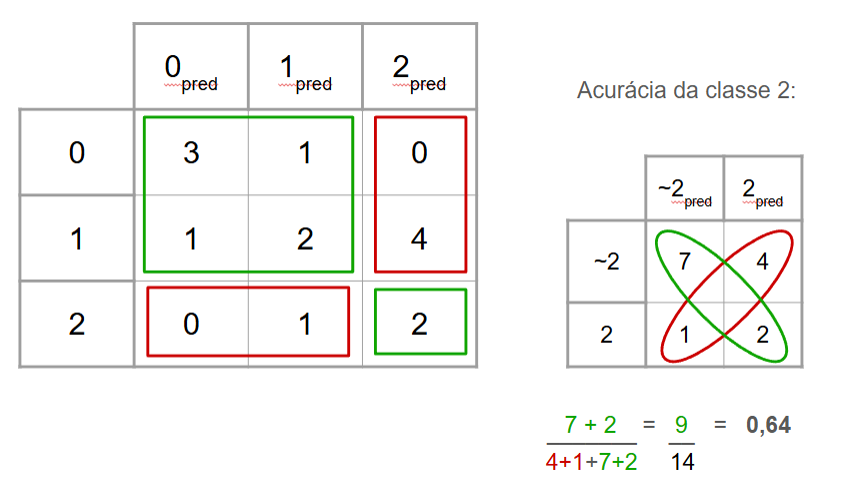

Este cálculo, junto ao fato do problema possuir 10 classes diferentes, pode levar a taxas de acerto estranhamente altas, mesmo que o desempenho geral tenha sido baixo.

In [ ]:
# Acurácia das classes
mlpPreds = [[],[],[],[],[],[],[],[],[],[]]
for i in range(len(y_test)): # len = batch size
    for j in range(10):
        # 1: o número foi corretamente previsto ou foi corretamente não-previsto
        # 0: o número previsto foi incorreto ou o número da correto não foi previsto
        mlpPreds[j].append(not((y_test[i]==j) ^ (y_pred[i]==j)))

# Print dos resultados
printstr = f'''- Test Loss = {mlp.loss_:.4f}
- Acurácia total = {accuracy_score(y_pred, y_test):.4f}
- Precisão total = {precision_score(y_pred, y_test, average='macro'):.4f}
- Recall total = {recall_score(y_pred, y_test, average='macro'):.4f}
- Acurácia das classes:
'''
for i in range(10):
    printstr += f"  - Classe {i}: {np.mean(mlpPreds[i]):.4f}\n"
print(printstr)

- Test Loss = 0.2490
- Acurácia total = 0.9629
- Precisão total = 0.9626
- Recall total = 0.9628
- Acurácia das classes:
  - Classe 0: 0.9960
  - Classe 1: 0.9942
  - Classe 2: 0.9926
  - Classe 3: 0.9894
  - Classe 4: 0.9924
  - Classe 5: 0.9936
  - Classe 6: 0.9943
  - Classe 7: 0.9939
  - Classe 8: 0.9902
  - Classe 9: 0.9892



## Histórico de testes

### V0

**Estrutura**

- 1 hidden layer com 40 neurônios

**Parâmetros**

- epochs = 60
- função de ativação = tanh
- otimizador = adam
- taxa de aprendizado = 0.1
- alpha = 0.0001
- early_stopping:
    - delta = 0.1
    - paciência = 10

**Performance**

- Test loss = 0.4154
- Acurácia total = 0.9157
- Precisão total = 0.9143
- Recall total = 0.9174
- Acurácia das classes:
  - Classe 0: 0.9890
  - Classe 1: 0.9896
  - Classe 2: 0.9836
  - Classe 3: 0.9806
  - Classe 4: 0.9811
  - Classe 5: 0.9826
  - Classe 6: 0.9900
  - Classe 7: 0.9859
  - Classe 8: 0.9773
  - Classe 9: 0.9717

---

### V1

**Estrutura**

(Mesma estrutura da anterior)

**Parâmetros**

Leve alteração dos parâmetros de aprendizado para aprimorar a efetividade do treinamento.

- função de ativação = relu
- learning rate = 0.05
- alpha = 0.05

**Performance**

- Test Loss = 0.3821
- Acurácia total = 0.9203 (aumento de 1%)
- Precisão total = 0.9202 (aumento de 1%)
- Recall total = 0.9214 (aumento de 1%)
- Acurácia das classes: (todas aumentaram levemente)
  - Classe 0: 0.9926
  - Classe 1: 0.9932
  - Classe 2: 0.9766
  - Classe 3: 0.9783
  - Classe 4: 0.9835
  - Classe 5: 0.9829
  - Classe 6: 0.9906
  - Classe 7: 0.9848
  - Classe 8: 0.9812
  - Classe 9: 0.9770

---

### V2

**Estrutura**

Tentativa de aprimorar o resultado aumentando a profundidade da rede neural (mais camadas ocultas), e diminuindo sua largura (menos neurônios por camada). Mas ainda sim, mantendo os 40 neurônios.

- 3 hidden layers, uma com 20 neurônios e duas com 10 neurônios cada

**Parâmetros**

(Mesmos do anterior)

**Performance**

- Test Loss = 0.4512
- Acurácia total = 0.9227 (aumento de ~0.2%)
- Precisão total = 0.9219 (aumento de ~0.2%)
- Recall total = 0.9224 (aumento de ~0.2%)
- Acurácia das classes:
  - Classe 0: 0.9922
  - Classe 1: 0.9940
  - Classe 2: 0.9854
  - Classe 3: 0.9810
  - Classe 4: 0.9858
  - Classe 5: 0.9807
  - Classe 6: 0.9881
  - Classe 7: 0.9852
  - Classe 8: 0.9755
  - Classe 9: 0.9773

---

### V3

**Estrutura**

Baseado no sucesso do aprofundamento do teste anterior, a estrutura dessa MLP feito para testar os limites de camadas, e ver se a melhora continuaria, mesmo com um número grande delas (quando comparada com as redes anteriores)

- 10 camadas, cinco com 10 neurônios e depois cinco com 5 neurônios

**Parâmetros**

(Mesmos do anterior)

**Performance**

- Test Loss = 2.3874
- Acurácia total = 0.5877 (queda grave)
- Precisão total = 0.5790 (queda grave)
- Recall total = 0.5082 (queda grave)
- Acurácia das classes:
  - Classe 0: 0.9364
  - Classe 1: 0.9894
  - Classe 2: 0.9031
  - Classe 3: 0.8764
  - Classe 4: 0.8712
  - Classe 5: 0.9067
  - Classe 6: 0.8888
  - Classe 7: 0.9778
  - Classe 8: 0.9162
  - Classe 9: 0.9093

---

### V4

**Estrutura**

Após a queda de perfomance no teste anterior, este teste foi feito para diminuir o número de camadas e definir até onde a performance aumenta junto com o número de camadas ocultas.

- 5 camadas com 5 neurônios cada

**Parâmetros**

Além disso, o atributo alpha e a taxa de aprendizagem foram reduzidos para tentar contrabalancear a quantidade maior de camadas.

- epochs = 200 (estava dando um aviso que não estava convergindo)
- alpha = 0.02
- learning rate = 0.01

**Performance**

- Test Loss = 0.4970
- Acurácia total = 0.8610 (~6% de queda do melhor)
- Precisão total = 0.8600 (~6% de queda do melhor)
- Recall total = 0.8602 (~6% de queda do melhor)
- Acurácia das classes:
  - Classe 0: 0.9857
  - Classe 1: 0.9810
  - Classe 2: 0.9751
  - Classe 3: 0.9613
  - Classe 4: 0.9745
  - Classe 5: 0.9614
  - Classe 6: 0.9842
  - Classe 7: 0.9757
  - Classe 8: 0.9583
  - Classe 9: 0.9648

---

### V5

**Estrutura**

- 3 hidden layers, uma com 20 neurônios e duas com 10 neurônios cada (como V2)

**Parâmetros**

Com a queda de performance dos testes com muitas camadas, este teste visa aprimorar o melhor momento até o momento, diminuindo a taxa de aprendizado e aumentando o alpha.

- learning rate = 0.01
- alpha = 0.1

**Performance**

- Test Loss = 0.2102
- Acurácia total = 0.9502 (aumento de ~3%)
- Precisão total = 0.9498 (aumento de ~3%)
- Recall total = 0.9501 (aumento de ~3%)
- Acurácia das classes:
  - Classe 0: 0.9946
  - Classe 1: 0.9934
  - Classe 2: 0.9881
  - Classe 3: 0.9878
  - Classe 4: 0.9908
  - Classe 5: 0.9898
  - Classe 6: 0.9923
  - Classe 7: 0.9905
  - Classe 8: 0.9858
  - Classe 9: 0.9873

---

### V6

**Estrutura**

Este teste foi feito para testar se, ao invés aprofundar a rede, seria melhor diminuir o número de camadas ocultas e aumentar o número de neurônios por camada. Como a primeira versão (V1) possuia 1 camada e 40 neurônios, foi feita uma tentativa de extrapolar a quantidade de neurônios para indicar se isso causaria uma queda ou um aumento da performance.

- 1 hidden layer, com 100 neurônios

**Parâmetros**

(Mesmos parâmetros do anterior)

**Performance**

- Test Loss = 0.1987
- Acurácia total = 0.9630 (aumento de ~1%)
- Precisão total = 0.9628 (aumento de ~1%)
- Recall total = 0.9633 (aumento de ~1%)
- Acurácia das classes:
  - Classe 0: 0.9956
  - Classe 1: 0.9947
  - Classe 2: 0.9917
  - Classe 3: 0.9895
  - Classe 4: 0.9940
  - Classe 5: 0.9933
  - Classe 6: 0.9949
  - Classe 7: 0.9934
  - Classe 8: 0.9894
  - Classe 9: 0.9895

---

### V7

**Estrutura**

(Mesma do anterior)

**Parâmetros**

Com o sucesso do modelo anterior, o objetivo deste teste é aprimorar sua performance sutilmente, ao aumentar o alpha e diminuir ainda mais a taxa de aprendizado.

- alpha = 0.2
- learning rate = 0.005

**Performance**

- Test Loss = 0.2036
- Acurácia total = 0.9643 (aumento de ~0.13%)
- Precisão total = 0.9638 (aumento de ~0.1%)
- Recall total = 0.9646 (aumento de ~0.15%)
- Acurácia das classes:
  - Classe 0: 0.9964
  - Classe 1: 0.9953
  - Classe 2: 0.9936
  - Classe 3: 0.9914
  - Classe 4: 0.9928
  - Classe 5: 0.9924
  - Classe 6: 0.9947
  - Classe 7: 0.9943
  - Classe 8: 0.9898
  - Classe 9: 0.9879

---

### V8 (Melhor Performance)

**Estrutura**

(Mesma do anterior)

**Parâmetros**

Mesmo motivo do teste anterior, aprimorar o que é o melhor até o momento, aumentando o alpha e diminuindo a taxa de aprendizado.

- alpha = 0.5
- learning rate = 0.001

**Performance**

- Test Loss = 0.2524
- Acurácia total = 0.9654 (aumento de ~0.1%)
- Precisão total = 0.9651 (aumento de ~0.1%)
- Recall total = 0.9654 (aumento de ~0.1%)
- Acurácia das classes:
  - Classe 0: 0.9960
  - Classe 1: 0.9948
  - Classe 2: 0.9934
  - Classe 3: 0.9904
  - Classe 4: 0.9934
  - Classe 5: 0.9936
  - Classe 6: 0.9942
  - Classe 7: 0.9941
  - Classe 8: 0.9903
  - Classe 9: 0.9907

---

### V9

**Estrutura**

(Mesma do anterior)

**Parâmetros**

Além de tentar aprimorar a perfomance anterior, este teste decidiu apenas reduzir a taxa de aprendizado (e consequentemente o número máximo de epochs). Sem alterações no alpha, parâmetro que é ligado à regularização e generalização do modelo.

- epochs = 100
- learning rate = 0.0001

**Performance**

- Test Loss = 0.2490
- Acurácia total = 0.9629 (queda de ~0.3%)
- Precisão total = 0.9626 (queda de ~0.3%)
- Recall total = 0.9628 (queda de ~0.3%)
- Acurácia das classes:
  - Classe 0: 0.9960
  - Classe 1: 0.9942
  - Classe 2: 0.9926
  - Classe 3: 0.9894
  - Classe 4: 0.9924
  - Classe 5: 0.9936
  - Classe 6: 0.9943
  - Classe 7: 0.9939
  - Classe 8: 0.9902
  - Classe 9: 0.9892

# CNN

### Dataset
Para a implementação modelo Convolutional Neural Network (CNN), foi utilizada majoritariamente a biblioteca Pytorch, que disponibiliza ferramentas para a construção de modelos CNN, além do mesmo dataset MNIST de números escritos.

In [ ]:
# Define the transformation to convert images to PyTorch tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset with the specified transformation
mnist_train = datasets.MNIST(root='/content', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='/content', train=False, download=True, transform=transform)

# Create a DataLoader to load the dataset in batches
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=10, shuffle=False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=10, shuffle=False)

In [3]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

### Results()

Classe utilizada para capturar e calcular a performance do modelo CNN durante e após o treinamento.

In [5]:
class Results():
    def __init__(self, num_classes:int):
        self.train_losses = []
        self.test_losses = []
        self.table = {}
        self.labels = []
        self.preds = []
        self.num_classes = num_classes
        self.class_preds = []
        for _ in range(self.num_classes):
            self.class_preds.append([])

    def __repr__(self):
        list_accs = self.class_acc()
        printstr = f'''- Train loss = {self.train_losses[-1]:.4f}
- Test loss = {self.test_losses[-1]:.4f}
- Acurácia total = {accuracy_score(self.labels, self.preds):.4f}
- Precisão total = {precision_score(self.labels, self.preds, average="macro"):.4f}
- Recall total = {recall_score(self.labels, self.preds, average="macro"):.4f}
- Acurácia das classes:
'''
        for i in range(self.num_classes):
            printstr += f"  - Classe {i}: {list_accs[i]:.4f}\n"
        return printstr

    def class_acc(self):
        list_accs = []
        for i in range(self.num_classes):
            list_accs.append(np.mean(self.class_preds[i]))
        return list_accs

    def addPreds(self, labels, outs):
        outs = torch.max(outs, dim=1).indices.to('cpu')
        #print(labels, outs)
        for i in range(len(labels)): # len = batch size
            for j in range(10):
                # 1: o número foi corretamente previsto ou foi corretamente não-previsto
                # 0: o número previsto foi incorreto ou o número da correto não foi previsto
                self.class_preds[j].append(not((labels[i]==j) ^ (outs[i]==j)))
        self.labels = self.labels + list(labels)
        self.preds = self.preds + list(outs)

### Classificador

In [34]:
class ConvNN(nn.Module):
    def __init__(self):
        super(ConvNN, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
            nn.ReLU(),
            #nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            #nn.BatchNorm2d(20),
            nn.ReLU(),
            #nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )

        self.fc1_2 = nn.Sequential(
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Linear(in_features=120, out_features=84),
            nn.Dropout(0.25)
        )
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1_2(x)
        x = self.fc3(x)
        #x = self.softmax(x)
        return x

### treinamento e teste:

In [12]:
def train_net(model, tloader, vloader, num_epochs, optimizer, lossFunc=nn.CrossEntropyLoss(), delta=None, patience=None):
    #train_losses = []
    #val_losses = []
    #cpa = ClassPreds(10)
    train_results = Results(10)
    best_score = None
    for e in range(num_epochs):
        train_loss = 0.0 # total loss during single epoch training
        val_loss = 0.0
        model.train()
        for i, (imgs, label) in enumerate(tloader):
            imgs, label = imgs.to(DEVICE), label.to(DEVICE)

            pred = model(imgs) # predictions based on batch imgs
            loss = lossFunc(pred, label)  # calculates the loss function result
            optimizer.zero_grad() # clears x.grad for every parameter x in the optimizer.
            loss.backward() # computes dloss/dx for every parameter x which has requires_grad=True. These are accumulated into x.grad for every parameter x
            optimizer.step() # updates the value of x using the gradient x.grad

            train_loss += loss.item()
            l = loss.item()
            train_loss += l # value of loss?
            #print(f'Epoch [{e + 1}/{num_epochs}], Step [{i + 1}/{len(tloader)}], Loss: {l:.4f} ')

        model.eval()
        with torch.no_grad():
            for imgs, label in vloader:
                imgs, label = imgs.to(DEVICE), label.to(DEVICE)
                pred = model(imgs)
                l = lossFunc(pred, label).item()
                val_loss += l

            avg_train_loss = train_loss / len(tloader)
            avg_val_loss = val_loss / len(vloader)
            print(f'Epoch [{e + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Eval Loss: {avg_val_loss:.4f}')
        train_results.train_losses.append(avg_train_loss)
        train_results.test_losses.append(avg_val_loss)

        if((delta is not None) and (patience is not None)):
            #avg_val_loss = -avg_val_loss
            if((best_score is None) or (np.abs(avg_val_loss-best_score) >= delta)):
                counter = 0
                best_score = avg_val_loss
            else:
                counter += 1
                if(counter>=patience):
                    print("Early Stopping!")
                    break

    # class accuracy measurement
    for imgs, label in vloader:
        imgs = imgs.to(DEVICE)
        pred = model(imgs)
        train_results.addPreds(label, pred)

    return train_results

In [38]:
cnn = ConvNN().to(DEVICE)
#mse_loss = nn.MSELoss()
#mae_loss = nn.L1Loss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
results = train_net(cnn, train_loader, test_loader, 60, optimizer, delta=0.01, patience=5)

Epoch [1/60], Train Loss: 0.3908, Eval Loss: 0.0980
Epoch [2/60], Train Loss: 0.2059, Eval Loss: 0.0583
Epoch [3/60], Train Loss: 0.1756, Eval Loss: 0.0594
Epoch [4/60], Train Loss: 0.1576, Eval Loss: 0.0645
Epoch [5/60], Train Loss: 0.1464, Eval Loss: 0.0585
Epoch [6/60], Train Loss: 0.1399, Eval Loss: 0.0477
Epoch [7/60], Train Loss: 0.1390, Eval Loss: 0.0522
Epoch [8/60], Train Loss: 0.1317, Eval Loss: 0.0578
Epoch [9/60], Train Loss: 0.1278, Eval Loss: 0.0548
Epoch [10/60], Train Loss: 0.1304, Eval Loss: 0.0459
Epoch [11/60], Train Loss: 0.1254, Eval Loss: 0.0387
Epoch [12/60], Train Loss: 0.1244, Eval Loss: 0.0426
Epoch [13/60], Train Loss: 0.1166, Eval Loss: 0.0595
Epoch [14/60], Train Loss: 0.1237, Eval Loss: 0.0553
Epoch [15/60], Train Loss: 0.1184, Eval Loss: 0.0421
Epoch [16/60], Train Loss: 0.1145, Eval Loss: 0.0352
Epoch [17/60], Train Loss: 0.1150, Eval Loss: 0.0325
Epoch [18/60], Train Loss: 0.1107, Eval Loss: 0.0431
Epoch [19/60], Train Loss: 0.1129, Eval Loss: 0.0522
Ep

In [37]:
print(cnn)

ConvNN(
  (block1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.25, inplace=False)
  )
  (fc1_2): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Dropout(p=0.25, inplace=False)
  )
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [39]:
results

- Train loss = 0.1089
- Test loss = 0.0416
- Acurácia total = 0.9872
- Precisão total = 0.9872
- Recall total = 0.9871
- Acurácia das classes:
  - Classe 0: 0.9975
  - Classe 1: 0.9981
  - Classe 2: 0.9974
  - Classe 3: 0.9981
  - Classe 4: 0.9973
  - Classe 5: 0.9974
  - Classe 6: 0.9979
  - Classe 7: 0.9967
  - Classe 8: 0.9982
  - Classe 9: 0.9958

## Histórico de testes

### V0

(Teste feito com versão inicial da CNN utilizada pelo experimento livro)

**Estrutura:**

    ConvNN(
        (block1): Sequential(
            (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
            (1): Tanh()
            (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
        (fc1): Linear(in_features=2880, out_features=100, bias=True)
        (softmax): Sequential(
            (0): Linear(in_features=100, out_features=10, bias=True)
            (1): Softmax(dim=1)
        )
    )
**Parâmetros:**

- batch_size = 10
- epochs = 60 (4 com parada do early stopping)
- função de perda = Cross Entropy Loss
- otimizador = adam
- taxa de aprendizado = 0.1
- early_stopping:
    - delta = 0.01
    - paciência = 3

**Performance:**

- Train loss = 4.6976
- Test loss = 2.3477
- Acurácia total = 0.1135
- Precisão total = 0.0114
- Recall total = 0.1000
- Acurácia das classes:
  - Classe 0: 0.9020
  - Classe 1: 0.1135
  - Classe 2: 0.8968
  - Classe 3: 0.8990
  - Classe 4: 0.9018
  - Classe 5: 0.9108
  - Classe 6: 0.9042
  - Classe 7: 0.8972
  - Classe 8: 0.9026
  - Classe 9: 0.8991

  ---

### V1

**Estrutura**

A arquitetura deste modelo foi a da rede LeNet. Sua escolha foi devido ao seu ótimo desempenho para este dataset em sua época.

Como se está lidando com um dataset com imagens de tamanho minúsculo, uma rede muito profunda provavelmente não causaria um impacto significativo no desempenho. Por isso é importante realizar o teste com um modelo clássico, para termos uma base de comparação para futuras performances.

    ConvNN(
      (block1): Sequential(
        (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): Tanh()
        (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
      )
      (block2): Sequential(
        (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
        (1): Tanh()
        (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
      )
      (fc1): Linear(in_features=400, out_features=120, bias=True)
      (fc2): Linear(in_features=120, out_features=84, bias=True)
      (fc3): Linear(in_features=84, out_features=10, bias=True)
    )

**Parâmetros**

- epochs = 60

**Performance**

- Train loss = 13209.6921
- Test loss = 9547.8903
- Acurácia total = 0.8789
- Precisão total = 0.9028
- Recall total = 0.8791
- Acurácia das classes:
  - Classe 0: 0.9959
  - Classe 1: 0.9884
  - Classe 2: 0.9871
  - Classe 3: 0.9779
  - Classe 4: 0.9614
  - Classe 5: 0.9768
  - Classe 6: 0.9906
  - Classe 7: 0.9724
  - Classe 8: 0.9720
  - Classe 9: 0.9353

---

### V2

**Estrutura**

(Mesma estrutura do anterior)

**Parâmetros**

- Taxa de aprendizado: 0.001
- Patience: 5

**Performance**

- Train loss = 0.0368
- Test loss = 0.1393
- Acurácia total = 0.9845
- Precisão total = 0.9846
- Recall total = 0.9845
- Acurácia das classes:
  - Classe 0: 0.9980
  - Classe 1: 0.9983
  - Classe 2: 0.9952
  - Classe 3: 0.9975
  - Classe 4: 0.9961
  - Classe 5: 0.9981
  - Classe 6: 0.9977
  - Classe 7: 0.9956
  - Classe 8: 0.9968
  - Classe 9: 0.9957

---

### V3

**Estrutura**

Inspirada na VGG. A redução das dimensões causada no final do bloco VGG ocorre apenas 2 vezes, devido à resolução das imagens do dataset.

Eu decidi testar essa arquitetura para ter uma noção do impacto que uma profundidade maior poderia causar. A inspiração pela VGG veio pela criação e manipulação fácil de seus blocos, que permitia uma profundidade levemente maior.

    ConvNN(
      (block1): Sequential(
        (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): ReLU()
        (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (block2): Sequential(
        (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (3): ReLU()
        (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (fc1): Linear(in_features=784, out_features=98, bias=True)
      (fc2): Linear(in_features=98, out_features=98, bias=True)
      (fc3): Linear(in_features=98, out_features=10, bias=True)
    )

**Parâmetros**

(Mesmos do anterior)

**Performance**

- Train loss = 0.0543
- Test loss = 0.0646
- Acurácia total = 0.9809 (diminuiu em ~0.3%)
- Precisão total = 0.9812 (diminuiu em ~0.2%)
- Recall total = 0.9805 (diminuiu em ~0.3%)
- Acurácia das classes:
  - Classe 0: 0.9976
  - Classe 1: 0.9979
  - Classe 2: 0.9948
  - Classe 3: 0.9962
  - Classe 4: 0.9974
  - Classe 5: 0.9954
  - Classe 6: 0.9971
  - Classe 7: 0.9954
  - Classe 8: 0.9959
  - Classe 9: 0.9941

**Obs.:** Apesar do desempenho ter caído um pouco, acho que isso ocorreu pelo número máximo de epochs que foi dado para o modelo treinar. Modelos mais profundos precisam de mais tempo para aprenderem. Apesar disso, 60 epochs com essa arquitetura resultaram em 27min de treinamento.

---

### V4

**Estrutura**

Inspirada na Network in Network (NiN). A NiN é uma rede com o propósito de diminuir altos custos de memória e custo computacional das redes anteriores, assim usando convoluções 1x1 que atuam como camadas FC, sem o alto gasto de memória. As convoluções 1x1 também permitem que a resolução da "imagem" continue a mesma ao longo do ciclo de aprendizado.

    ConvNN(
      (block1): Sequential(
        (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        (3): ReLU()
        (4): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
        (5): ReLU()
        (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (block2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1))
        (3): ReLU()
        (4): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (5): ReLU()
        (6): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
        (7): ReLU()
        (8): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (globalAvg): AvgPool2d(kernel_size=4, padding=0)
    )

**Parâmetros**

- epochs = 60 (13 com a parada do early stopping)

**Performance**

- Train loss = 0.2751
- Test loss = 0.1635
- Acurácia total = 0.9499 (queda de 3%)
- Precisão total = 0.9511 (queda de 3%)
- Recall total = 0.9500 (queda de 3%)
- Acurácia das classes:
  - Classe 0: 0.9920
  - Classe 1: 0.9961
  - Classe 2: 0.9816
  - Classe 3: 0.9919
  - Classe 4: 0.9931
  - Classe 5: 0.9887
  - Classe 6: 0.9933
  - Classe 7: 0.9848
  - Classe 8: 0.9920
  - Classe 9: 0.9863

---

### V5

**Estrutura**

Como a estrutura complexa dos dois últimos modelos prejudicou a performance, nesta versão, decidi diminuir a quantidade de convoluções do último modelo, para observar se isso leva a alguma melhora. Além disso, o early stopping do último teste pode ser indicativo de overfitting, então também adicionarei uma camada de dropout.

    ConvNN(
      (block1): Sequential(
        (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        (3): ReLU()
        (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Dropout(p=0.25, inplace=False)
      )
      (block2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
        (2): Conv2d(16, 10, kernel_size=(1, 1), stride=(1, 1))
        (3): ReLU()
        (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
        (5): Dropout(p=0.25, inplace=False)
      )
      (globalAvg): AvgPool2d(kernel_size=4, stride=4, padding=0)
    )

**Parâmetros**

- dropout = 0.25 (Novo)

**Performance**

- Train loss = 2.9919
- Test loss = 1.1584
- Acurácia total = 0.6322
- Precisão total = 0.4615
- Recall total = 0.6345
- Acurácia das classes:
  - Classe 0: 0.9177
  - Classe 1: 0.8861
  - Classe 2: 0.8968
  - Classe 3: 0.9382
  - Classe 4: 0.9572
  - Classe 5: 0.9506
  - Classe 6: 0.9703
  - Classe 7: 0.8972
  - Classe 8: 0.9026
  - Classe 9: 0.9477

---

### V6

**Estrutura**

Pela queda grave da performance do modelo passado, decidiu-se voltar para a arquitetura LeNet e alterá-la levemente, como mudar a função de ativação (para a ReLU, que é considerada melhor por não dar problemas de vanishing gradient), o pooling (para o Max Pooling, que é usado na maioria dos modelos mais atuais) e adicionar dropout (para maior generalização)

    ConvNN(
      (block1): Sequential(
        (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      )
      (block2): Sequential(
        (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
        (1): ReLU()
        (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (3): Dropout(p=0.25, inplace=False)
      )
      (fc1_2): Sequential(
        (0): Linear(in_features=400, out_features=120, bias=True)
        (1): Linear(in_features=120, out_features=84, bias=True)
        (2): Dropout(p=0.25, inplace=False)
      )
      (fc3): Linear(in_features=84, out_features=10, bias=True)
    )

**Parâmetros**

**Performance**



---

### V7 (Melhor Performance)

**Estrutura**

(Mesma do anterior)

**Parâmetros**

Em uma tentativa de apenas aprimorar os resultados do teste anterior, usando a mesma estrutura, alguns parâmetros foram alterados.


**Performance**

- Train loss = 0.1089
- Test loss = 0.0416 (-0.1 do segundo melhor)
- Acurácia total = 0.9872 (+0.3% do segundo melhor)
- Precisão total = 0.9872 (+0.3% do segundo melhor)
- Recall total = 0.9871 (+0.3% do segundo melhor)
- Acurácia das classes:
  - Classe 0: 0.9975
  - Classe 1: 0.9981
  - Classe 2: 0.9974
  - Classe 3: 0.9981
  - Classe 4: 0.9973
  - Classe 5: 0.9974
  - Classe 6: 0.9979
  - Classe 7: 0.9967
  - Classe 8: 0.9982
  - Classe 9: 0.9958

# Resultados

## Observações
- Nenhuma rede neural levemente profunda conseguiu um desempenho satisfatório. Enquanto redes mais simples e rasas provaram ser mais efetivas. Isso pode ser consequência da simplicidade do problema.
- A CNN se saiu melhor que a MLP, o que é de se esperar, devido a especialidade da CNN para imagens
- A taxa de acerto das classes não se modificou muito apesar das flutuações de performance geral. O que é resultado da grande quantidade de classes e da métrica da taxa (acurácia).
